In [119]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [120]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [121]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.


A subdirectory or file -p already exists.
Error occurred while processing: -p.


# Generator

In [122]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [123]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [124]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [125]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [126]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [127]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [128]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [129]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [130]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [131]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:11, 10.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


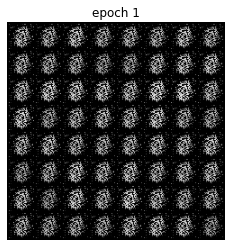

Epoch 1 of 100
Generator loss: -0.23406453, Discriminator loss: 0.42905313


118it [00:10, 10.79it/s]                         


Epoch 2 of 100
Generator loss: -0.00001817, Discriminator loss: 0.00003353


118it [00:10, 10.79it/s]                         


Epoch 3 of 100
Generator loss: -0.00001855, Discriminator loss: 0.00003014


118it [00:11, 10.58it/s]                         


Epoch 4 of 100
Generator loss: -0.00001830, Discriminator loss: 0.00002760


118it [00:11, 10.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


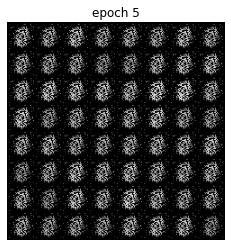

Epoch 5 of 100
Generator loss: -0.00001777, Discriminator loss: 0.00002599


118it [00:11, 10.40it/s]                         


Epoch 6 of 100
Generator loss: -0.00001815, Discriminator loss: 0.00002481


118it [00:11, 10.57it/s]                         


Epoch 7 of 100
Generator loss: -0.00001863, Discriminator loss: 0.00002600


118it [00:10, 10.74it/s]                         


Epoch 8 of 100
Generator loss: -0.00002185, Discriminator loss: 0.00002804


118it [00:11, 10.65it/s]                         


Epoch 9 of 100
Generator loss: -0.00009534, Discriminator loss: 0.00012174


118it [00:11, 10.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


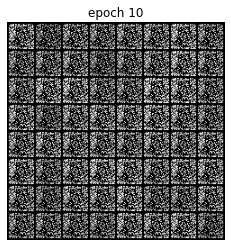

Epoch 10 of 100
Generator loss: -0.00018646, Discriminator loss: 0.00549111


118it [00:11, 10.17it/s]                         


Epoch 11 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.58it/s]                         


Epoch 12 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.76it/s]                         


Epoch 13 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.54it/s]                         


Epoch 14 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


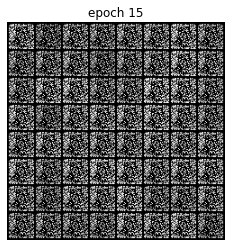

Epoch 15 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.48it/s]                         


Epoch 16 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.40it/s]                         


Epoch 17 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.53it/s]                         


Epoch 18 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.64it/s]                         


Epoch 19 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


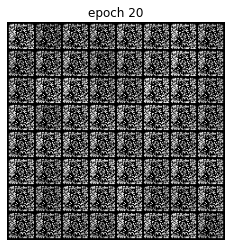

Epoch 20 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.44it/s]                         


Epoch 21 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.28it/s]                         


Epoch 22 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.37it/s]                         


Epoch 23 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.82it/s]                         


Epoch 24 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:11, 10.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


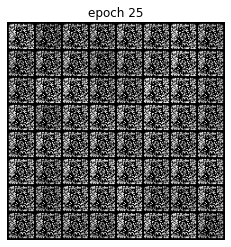

Epoch 25 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000003


118it [00:11, 10.33it/s]                         


Epoch 26 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.52it/s]                         


Epoch 27 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.38it/s]                         


Epoch 28 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.35it/s]                         


Epoch 29 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


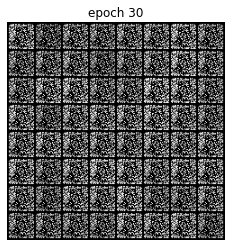

Epoch 30 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:11, 10.60it/s]                         


Epoch 31 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.26it/s]                         


Epoch 32 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.07it/s]                         


Epoch 33 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.18it/s]                         


Epoch 34 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


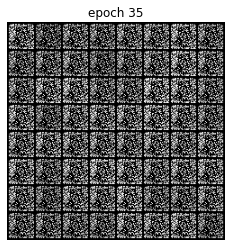

Epoch 35 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.96it/s]                         


Epoch 36 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.18it/s]                         


Epoch 37 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.02it/s]                         


Epoch 38 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.17it/s]                         


Epoch 39 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


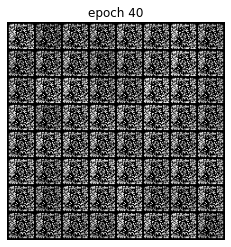

Epoch 40 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.20it/s]                         


Epoch 41 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.03it/s]                         


Epoch 42 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.75it/s]                         


Epoch 43 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.13it/s]                         


Epoch 44 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


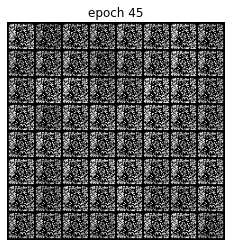

Epoch 45 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.03it/s]                         


Epoch 46 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.59it/s]                         


Epoch 47 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.01it/s]                         


Epoch 48 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.61it/s]                         


Epoch 49 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000005


118it [00:12,  9.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


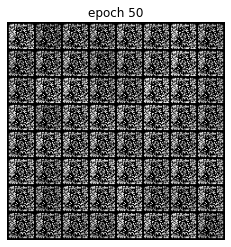

Epoch 50 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.69it/s]                         


Epoch 51 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.85it/s]                         


Epoch 52 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.55it/s]                         


Epoch 53 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.81it/s]                         


Epoch 54 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


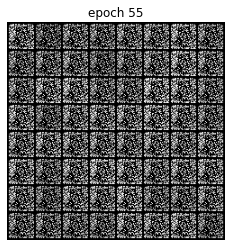

Epoch 55 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.76it/s]                         


Epoch 56 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.65it/s]                         


Epoch 57 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.57it/s]                         


Epoch 58 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.55it/s]                         


Epoch 59 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.43it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


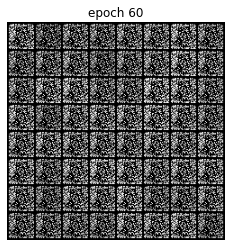

Epoch 60 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.33it/s]                         


Epoch 61 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.34it/s]                         


Epoch 62 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.44it/s]                         


Epoch 63 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.98it/s]                         


Epoch 64 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


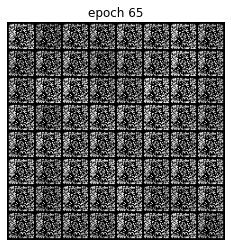

Epoch 65 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.23it/s]                         


Epoch 66 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.26it/s]                         


Epoch 67 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.31it/s]                         


Epoch 68 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.98it/s]                         


Epoch 69 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:13,  9.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


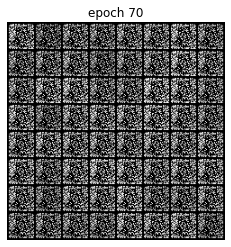

Epoch 70 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.09it/s]                         


Epoch 71 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.12it/s]                         


Epoch 72 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.30it/s]                         


Epoch 73 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.91it/s]                         


Epoch 74 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


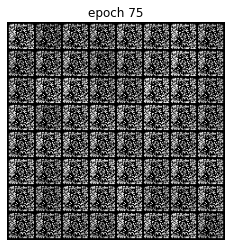

Epoch 75 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  9.05it/s]                         


Epoch 76 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  9.08it/s]                         


Epoch 77 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.90it/s]                         


Epoch 78 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.17it/s]                         


Epoch 79 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.19it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


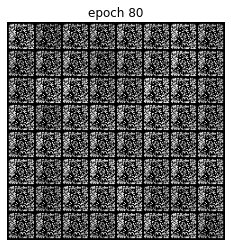

Epoch 80 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.98it/s]                         


Epoch 81 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.96it/s]                         


Epoch 82 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.16it/s]                         


Epoch 83 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.93it/s]                         


Epoch 84 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.96it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


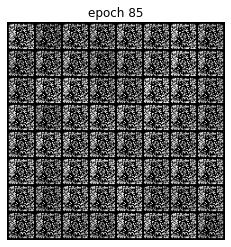

Epoch 85 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.11it/s]                         


Epoch 86 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.79it/s]                         


Epoch 87 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  9.02it/s]                         


Epoch 88 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  9.06it/s]                         


Epoch 89 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


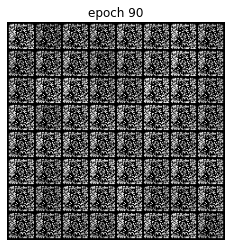

Epoch 90 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.93it/s]                         


Epoch 91 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.99it/s]                         


Epoch 92 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.88it/s]                         


Epoch 93 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.75it/s]                         


Epoch 94 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


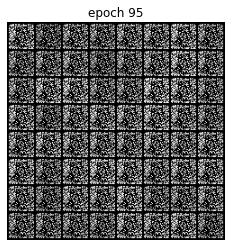

Epoch 95 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.72it/s]                         


Epoch 96 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.56it/s]                         


Epoch 97 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.75it/s]                         


Epoch 98 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.77it/s]                         


Epoch 99 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


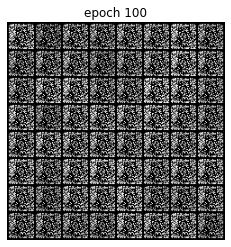

Epoch 100 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


In [132]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    
    ######################################

def generator_loss_q2(output, true_label):
    return - criterion(output, true_label)
    
def discriminator_loss(output_real, true_label_real, output_fake, true_label_fake):
    ############ YOUR CODE HERE ##########
    
    return criterion(output_real, true_label_real) + criterion(output_fake, true_label_fake)
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        now_bs = data[0].shape[0]
        train_noise = create_noise(now_bs, nz)
        optim_d.zero_grad()
        optim_g.zero_grad()
        generated_img = generator(train_noise)
        real_img = data[0].to(device)
        output_real = discriminator(real_img)
        output_fake = discriminator(generated_img)
        # print(output_real)
        loss_d_ep = discriminator_loss(output_real, label_real(now_bs), output_fake, label_fake(now_bs)) #taking negative to maximize the loss
        # print(loss_d_ep)
        loss_d_ep.backward()
        loss_d = loss_d + loss_d_ep
        optim_d.step()

        optim_d.zero_grad()
        optim_g.zero_grad()
        train_noise = create_noise(now_bs, nz)
        generated_img = generator(train_noise)
        output_fake = discriminator(generated_img)
        # loss_g_ep = generator_loss(output_fake, label_real(now_bs))
        loss_g_ep = generator_loss_q2(output_fake, label_fake(now_bs))
        loss_g = loss_g + loss_g_ep
        loss_g_ep.backward()
        optim_g.step()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or epoch == 0 :
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [133]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [134]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

In [136]:
for i in range(len(losses_g)):
    losses_g[i] = losses_g[i].cpu().detach().numpy()
    losses_d[i] = losses_d[i].cpu().detach().numpy()

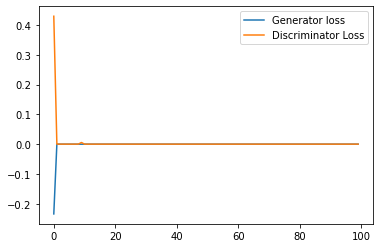

In [137]:
# plot and save the generator and discriminator loss
plt.figure()

plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.pdf')

In [138]:
losses_g

[array(-0.23406453, dtype=float32),
 array(-1.8172508e-05, dtype=float32),
 array(-1.8545821e-05, dtype=float32),
 array(-1.8301165e-05, dtype=float32),
 array(-1.7771483e-05, dtype=float32),
 array(-1.8148954e-05, dtype=float32),
 array(-1.8630637e-05, dtype=float32),
 array(-2.1847376e-05, dtype=float32),
 array(-9.533713e-05, dtype=float32),
 array(-0.00018646, dtype=float32),
 array(-9.950028e-13, dtype=float32),
 array(-9.950028e-13, dtype=float32),
 array(-1.7910054e-11, dtype=float32),
 array(0., dtype=float32),
 array(-9.950028e-13, dtype=float32),
 array(0., dtype=float32),
 array(-1.9900056e-12, dtype=float32),
 array(-1.9900058e-12, dtype=float32),
 array(-1.9900056e-12, dtype=float32),
 array(-1.9900056e-12, dtype=float32),
 array(-2.9850085e-12, dtype=float32),
 array(-7.960023e-12, dtype=float32),
 array(-4.975014e-12, dtype=float32),
 array(-1.9900056e-12, dtype=float32),
 array(-9.950028e-13, dtype=float32),
 array(-3.980011e-12, dtype=float32),
 array(-9.950028e-13, dt